## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
print('necessary libraries imported')

necessary libraries imported


### 2. Load the dataset and display a sample of five rows of the data frame.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Display a sample of five rows
sample = data.sample(5)
print(sample)


       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth   
41191            No  19.05      No              No     No             0.0  \
241287           No  27.98      No              No     No             2.0   
85952            No  28.97      No              No     No             2.0   
53584            No  25.53      No              No     No             0.0   
175670          Yes  38.01     Yes              No     No            30.0   

        MentalHealth DiffWalking     Sex AgeCategory   Race   
41191            0.0          No  Female       65-69  White  \
241287           0.0          No    Male       30-34  White   
85952            2.0         Yes    Male       60-64  White   
53584            0.0          No  Female       70-74  White   
175670          30.0         Yes    Male       60-64  White   

                      Diabetic PhysicalActivity  GenHealth  SleepTime Asthma   
41191   Yes (during pregnancy)              Yes       Good        8.0    Yes  

### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Check the shape of the data
print("Shape of the DataFrame:", data.shape)

# Display general information about the DataFrame
data.info()


Shape of the DataFrame: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-nu

### 4. Check the statistical summary of the dataset and write your inferences.

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Check the statistical summary
summary = data.describe()
print(summary)


                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Check the percentage of missing values in each column
missing_percentages = (data.isnull().sum() / len(data)) * 100
print("Percentage of missing values:\n", missing_percentages)

# Drop rows with missing values
data.dropna(inplace=True)

# Verify if missing values are dropped
print("Shape after dropping missing values:", data.shape)


Percentage of missing values:
 HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64
Shape after dropping missing values: (319795, 18)


### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Check for duplicate rows
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Drop duplicate rows
data.drop_duplicates(inplace=True)

# Verify the shape after dropping duplicates
print("Shape after dropping duplicates:", data.shape)

# Save the modified DataFrame back to the CSV file
data.to_csv('heart_2020_cleaned.csv', index=False)


Number of duplicate rows: 18078
Shape after dropping duplicates: (301717, 18)


In [7]:
# Retrieve the number of rows and columns
num_rows, num_columns = data.shape

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)
# Save the modified DataFrame as a new CSV file
data.to_csv('heart_2020_cleaned_modified.csv', index=False)


Number of rows: 301717
Number of columns: 18


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

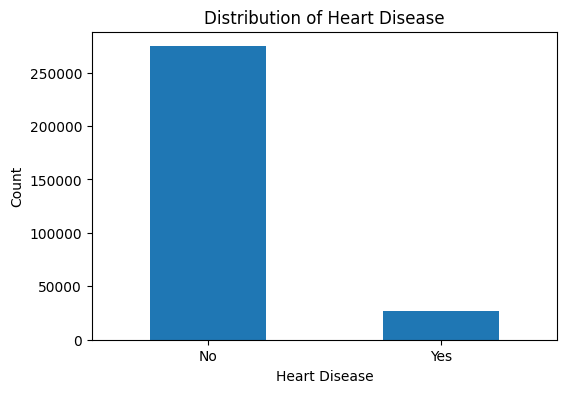

Percentage distribution of Heart Disease:
 HeartDisease
No     90.964712
Yes     9.035288
Name: count, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Check the distribution of the target variable
target_distribution = data['HeartDisease'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 4))
target_distribution.plot(kind='bar')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Calculate percentage distribution
percentage_distribution = target_distribution / len(data) * 100
print("Percentage distribution of Heart Disease:\n", percentage_distribution)



### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

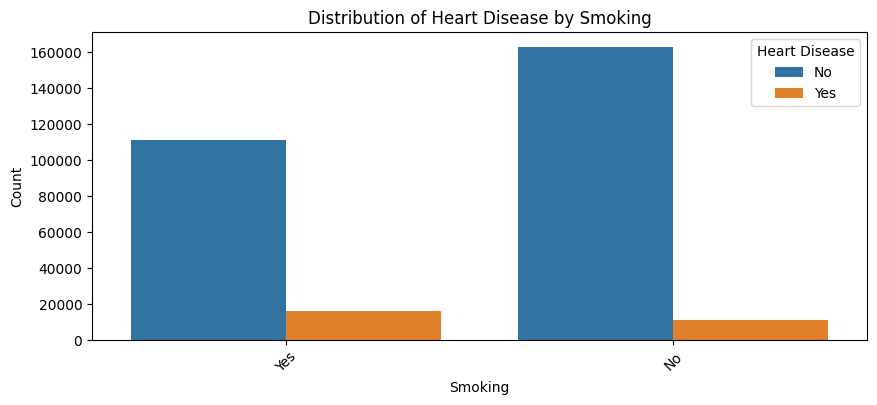

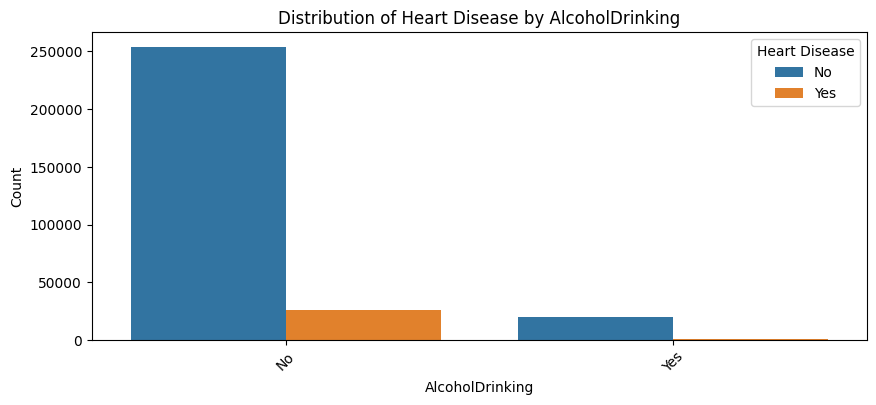

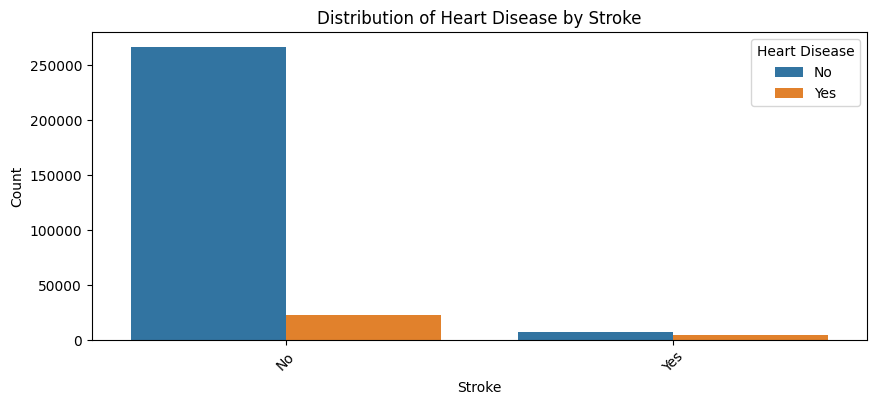

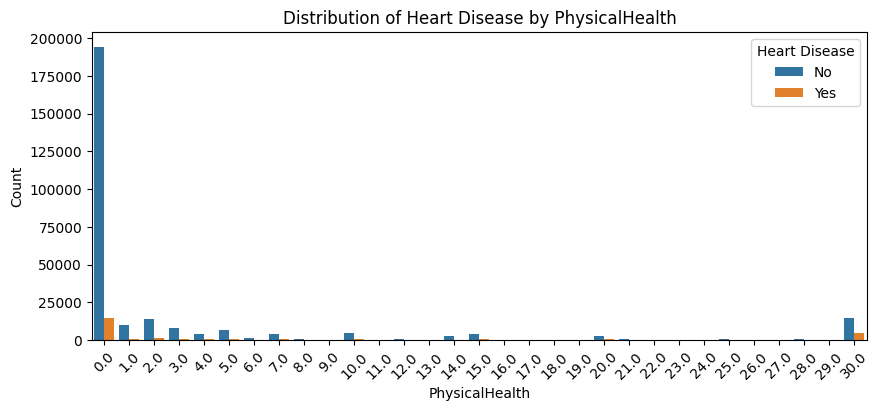

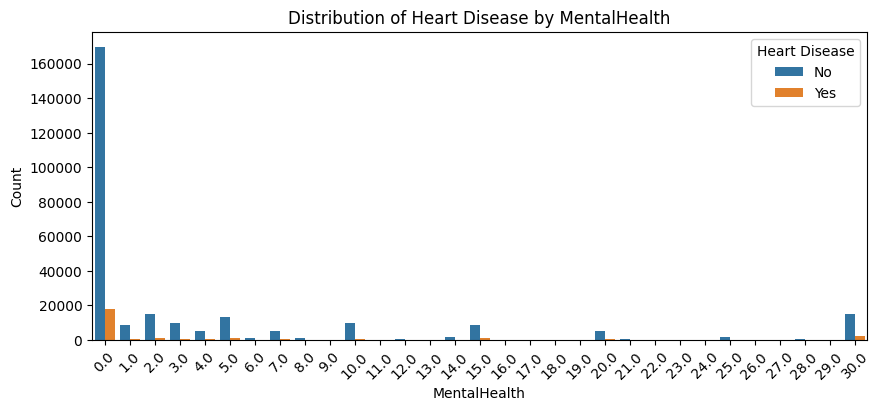

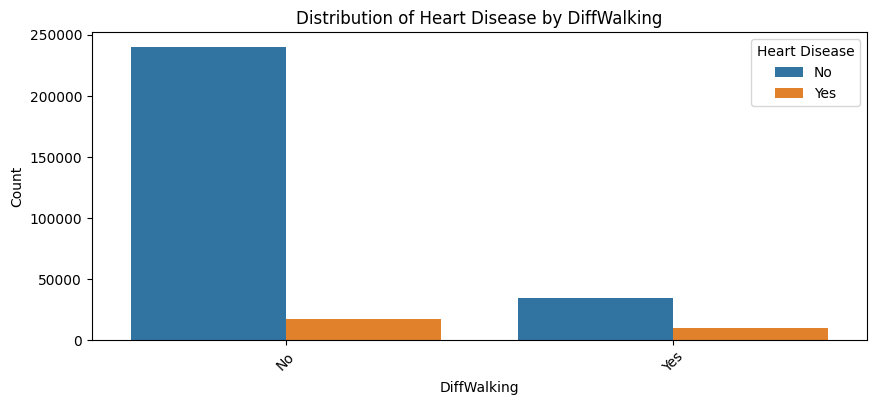

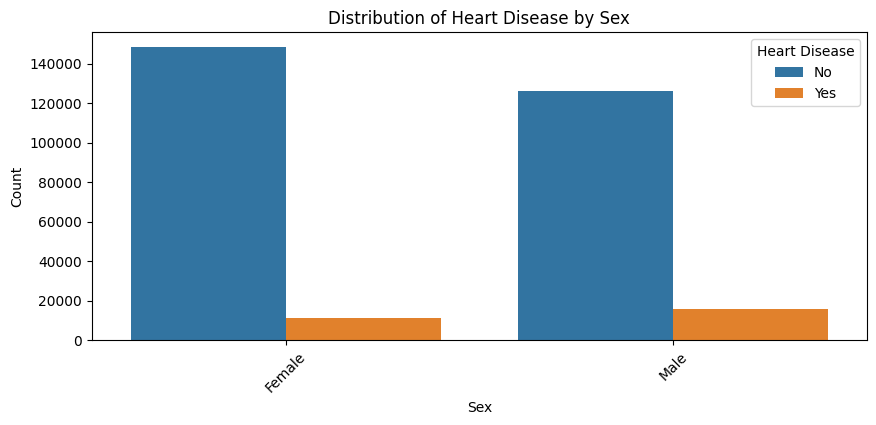

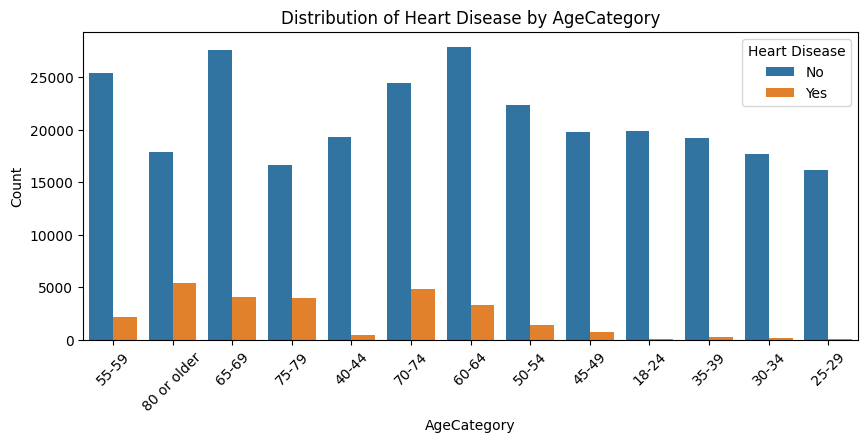

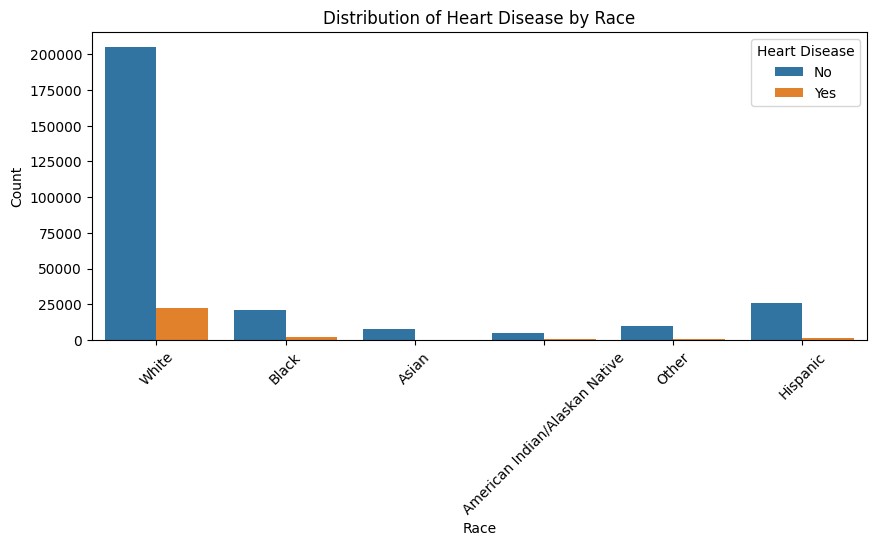

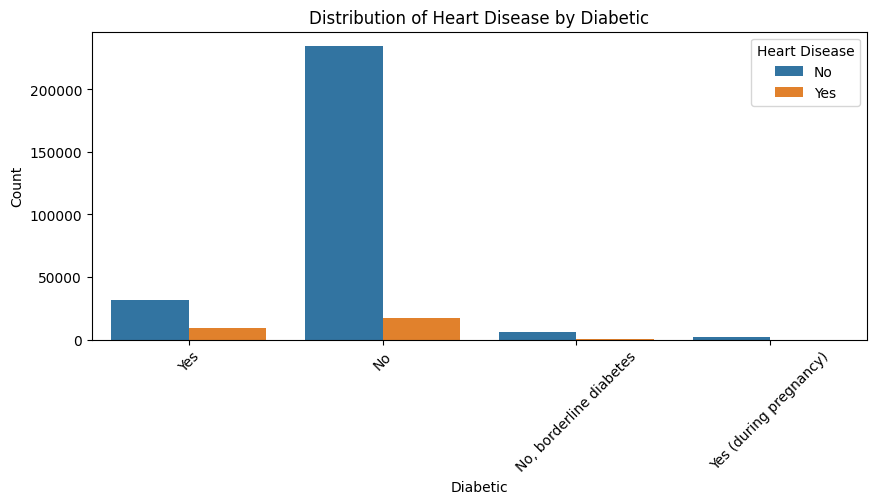

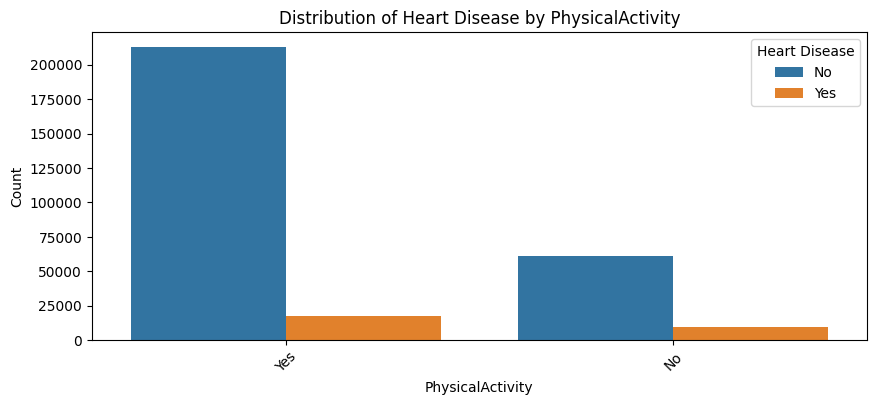

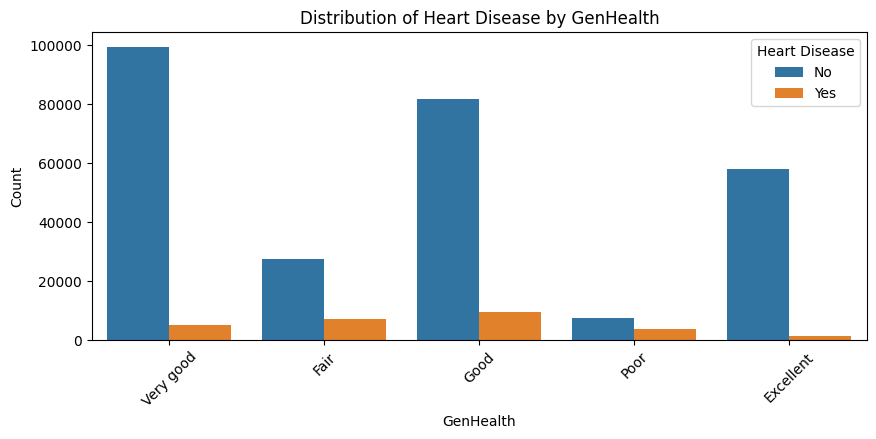

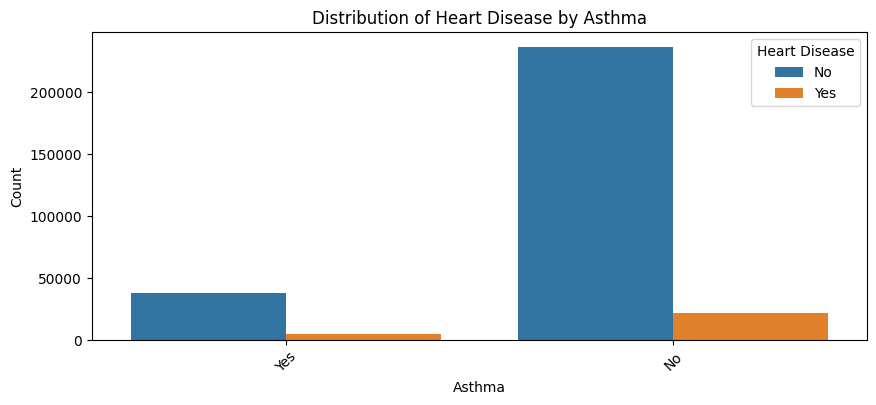

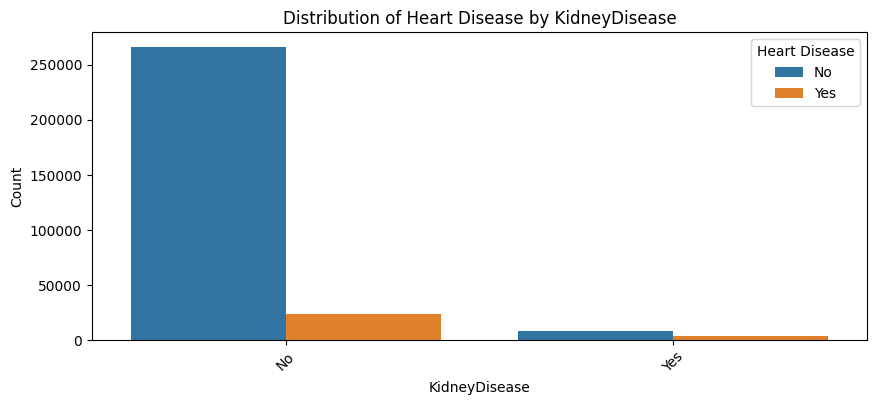

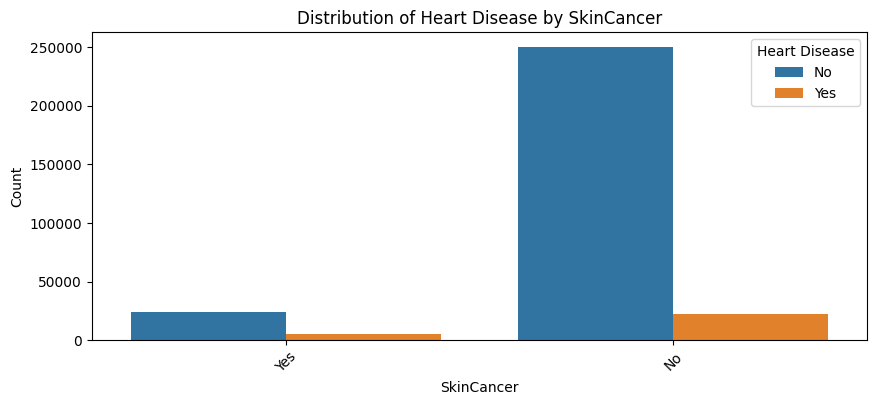

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Categorical features to consider
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Plot the distribution of the target with respect to categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, hue='HeartDisease', data=data)
    plt.title(f'Distribution of Heart Disease by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Heart Disease', labels=['No', 'Yes'])
    plt.show()


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Check unique categories in the 'Diabetic' column
unique_categories = data['Diabetic'].unique()
print("Unique categories in 'Diabetic':", unique_categories)

# Replace specific values in the 'Diabetic' column
data['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'}, inplace=True)

# Verify the changes
unique_categories_after_replace = data['Diabetic'].unique()
print("Unique categories in 'Diabetic' after replacing values:", unique_categories_after_replace)


Unique categories in 'Diabetic': ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique categories in 'Diabetic' after replacing values: ['Yes' 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Replace values in the 'HeartDisease' column
data['HeartDisease'].replace({'No': 0, 'Yes': 1}, inplace=True)

# Verify the changes
print("Unique values in 'HeartDisease' column after replacement:", data['HeartDisease'].unique())
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Replace values in the 'HeartDisease' column
data['HeartDisease'].replace({'No': 0, 'Yes': 1}, inplace=True)

# Verify the changes
print("Unique values in 'HeartDisease' column after replacement:", data['HeartDisease'].unique())


Unique values in 'HeartDisease' column after replacement: [0 1]
Unique values in 'HeartDisease' column after replacement: [0 1]


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Columns to label encode
columns_to_label_encode = ["AgeCategory", "Race", "GenHealth"]

# Label encode the specified columns
label_encoder = LabelEncoder()
for column in columns_to_label_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Columns to encode using dummy encoding
columns_to_dummy_encode = data.columns.difference(columns_to_label_encode)

# Perform dummy encoding
data_encoded = pd.get_dummies(data, columns=columns_to_dummy_encode)

# Verify the encoding
print(data_encoded.head())



   AgeCategory  Race  GenHealth  AlcoholDrinking_No  AlcoholDrinking_Yes   
0            7     5          4                True                False  \
1           12     5          4                True                False   
2            9     5          1                True                False   
3           11     5          2                True                False   
4            4     5          4                True                False   

   Asthma_No  Asthma_Yes  BMI_12.02  BMI_12.08  BMI_12.13  ...   
0      False        True      False      False      False  ...  \
1       True       False      False      False      False  ...   
2      False        True      False      False      False  ...   
3       True       False      False      False      False  ...   
4       True       False      False      False      False  ...   

   SleepTime_19.0  SleepTime_20.0  SleepTime_21.0  SleepTime_22.0   
0           False           False           False           False  \
1       

### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [13]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Store the target column in y
y = data['HeartDisease']
print("y:\n", y)

# Store the remaining columns in X
X = data.drop('HeartDisease', axis=1)
print("X:\n", X)



y:
 0          No
1          No
2          No
3          No
4          No
         ... 
301712    Yes
301713     No
301714     No
301715     No
301716     No
Name: HeartDisease, Length: 301717, dtype: object
X:
           BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth   
0       16.60     Yes              No     No             3.0          30.0  \
1       20.34      No              No    Yes             0.0           0.0   
2       26.58     Yes              No     No            20.0          30.0   
3       24.21      No              No     No             0.0           0.0   
4       23.71      No              No     No            28.0           0.0   
...       ...     ...             ...    ...             ...           ...   
301712  27.41     Yes              No     No             7.0           0.0   
301713  29.84     Yes              No     No             0.0           0.0   
301714  24.24      No              No     No             0.0           0.0   
301715  

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Separate the target variable
y = data['HeartDisease']
X = data.drop('HeartDisease', axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (211201, 17)
Shape of y_train: (211201,)
Shape of X_test: (90516, 17)
Shape of y_test: (90516,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Separate the target variable
y = data['HeartDisease']
X = data.drop('HeartDisease', axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify the numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Standardize the numerical columns for train data
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Standardize the numerical columns for test data
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Print the standardized train and test data
print("Standardized X_train:\n", X_train)
print("Standardized X_test:\n", X_test)


Standardized X_train:
              BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth   
169390 -1.132899     Yes              No     No       -0.439473     -0.384657  \
200301  0.039479      No              No     No       -0.439473     -0.507567   
161434  0.039479      No              No     No       -0.439473     -0.507567   
8419   -0.413099     Yes              No     No       -0.439473      0.106980   
127112 -0.105716     Yes              No     No       -0.316708     -0.507567   
...          ...     ...             ...    ...             ...           ...   
119879 -0.135065      No              No     No       -0.439473     -0.507567   
259178 -1.617914     Yes              No     No       -0.439473      2.565168   
131932 -0.016128      No              No     No        0.665410      1.950621   
146867 -0.929007     Yes              No     No        0.174351      3.179715   
121958 -1.132899      No              No     No       -0.439473     -0.507567   

    

### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

def train_and_predict(model, data):
    # Separate the target variable
    y = data['HeartDisease']
    X = data.drop('HeartDisease', axis=1)

    # Encode categorical variables
    categorical_columns = X.select_dtypes(include='object').columns
    for column in categorical_columns:
        label_encoder = LabelEncoder()
        X[column] = label_encoder.fit_transform(X[column])

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fit the model with the train data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return y_pred, accuracy, X_test, y_test

# Load the dataset
data = pd.read_csv('heart_2020_cleaned_modified.csv')

# Create an instance of the model
model = RandomForestClassifier()

# Call the function and get the predictions, accuracy score, and test set
predictions, accuracy, X_test, y_test = train_and_predict(model, data)

# Print the accuracy score
print("Accuracy Score:", accuracy)

# Print the predictions
print("Predictions:", predictions)

# Print the test set and corresponding actual values
print("Test Set:\n", X_test)
print("Actual Values:\n", y_test)


Accuracy Score: 0.8994542401343409
Predictions: ['No' 'No' 'No' ... 'No' 'No' 'No']
Test Set:
           BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth   
269634  35.59        0                0       0             0.0           2.0  \
197526  27.80        0                0       0             0.0           0.0   
282034  25.79        0                0       0             2.0           2.0   
116745  38.47        1                0       1             1.0           1.0   
101138  27.32        0                0       0             0.0           2.0   
...       ...      ...              ...     ...             ...           ...   
189956  26.45        0                0       0             0.0           0.0   
125369  27.37        0                0       0            30.0          30.0   
182896  21.45        0                0       0             0.0           0.0   
218672  42.51        0                0       0             0.0           0.0   
273368  29.99 

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [20]:
# Import the necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Generate a random classification dataset (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr_accuracy = round(accuracy_score(y_test, lr_predictions), 5)

# Train and evaluate K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = round(accuracy_score(y_test, knn_predictions), 5)

# Train and evaluate Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
nb_accuracy = round(accuracy_score(y_test, nb_predictions), 5)

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = round(accuracy_score(y_test, dt_predictions), 5)

# Train and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test, rf_predictions), 5)

# Train and evaluate AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_predictions = ada.predict(X_test)
ada_accuracy = round(accuracy_score(y_test, ada_predictions), 5)

# Train and evaluate Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_predictions = gb.predict(X_test)
gb_accuracy = round(accuracy_score(y_test, gb_predictions), 5)

# Train and evaluate Stacked Classifier
estimators = [('lr', lr), ('knn', knn), ('nb', nb), ('dt', dt), ('rf', rf), ('ada', ada), ('gb', gb)]
stacked = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacked.fit(X_train, y_train)
stacked_predictions = stacked.predict(X_test)
stacked_accuracy = round(accuracy_score(y_test, stacked_predictions), 5)

# Compare the accuracies of different models
model_accuracies = {
    'Logistic Regression': lr_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'AdaBoost': ada_accuracy,
    'Gradient Boosting': gb_accuracy,
    'Stacked Classifier': stacked_accuracy
}

for model, accuracy in model_accuracies.items():
    print(f'{model}: {accuracy}')


Logistic Regression: 0.83
K-Nearest Neighbors: 0.8
Naive Bayes: 0.81
Decision Tree: 0.83
Random Forest: 0.875
AdaBoost: 0.88
Gradient Boosting: 0.9
Stacked Classifier: 0.88


### Conclusion

In [ ]:
Based on these results, we can draw a few conclusions and suggest steps to improve the accuracy of the model in the future:
    
    1. Gradient Boosting achieved the highest accuracy of 0.9, indicating its effectiveness in this scenario. It should be 
    considered as the baseline model for future improvements.
    
    2. Random Forest and AdaBoost also performed well, with accuracy scores of 0.875 and 0.88, respectively. 
    These models are worth exploring further and fine-tuning to potentially increase accuracy.
    
    3.Logistic Regression, Decision Tree, and Stacked Classifier all achieved accuracy scores around 0.83. 
    These models can be improved by adjusting hyperparameters or considering different feature selection 
    techniques to capture more relevant information.
    
    4.K-Nearest Neighbors and Naive Bayes achieved the lowest accuracy scores of 0.8 and 0.81, respectively. 
    It may be worth exploring alternative algorithms or feature engineering techniques to improve their performance.
    
    5.Consider the possibility of ensemble methods, such as stacking or blending, to combine the strengths 
    of multiple models. The Stacked Classifier already achieved a high accuracy score of 0.88, but there might be 
    room for further improvement by experimenting with different combinations of base models and meta-classifiers.
    
    6.Evaluate the possibility of collecting additional data or augmenting the existing dataset to enhance model performance. 
    A larger and more diverse dataset could potentially provide more discriminatory power to the models.
    
    7.Perform feature engineering to extract more informative features from the existing data. This could involve 
    domain knowledge or using techniques like dimensionality reduction or feature transformation.
    
    8.Conduct more thorough hyperparameter tuning for each model. Fine-tuning the hyperparameters specific to each 
    algorithm could lead to improved accuracy.
    
    9.Investigate if any data preprocessing steps, such as normalization, scaling, or handling missing values, 
    need to be refined to better suit the characteristics of the dataset.
    
    10.Perform cross-validation and evaluate the models on different subsets of the data to ensure the observed 
    accuracies are consistent and reliable. This will help identify if any models are overfitting or underperforming.

----
## Happy Learning:)
----